In [80]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_absolute_error,accuracy_score, classification_report
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math

In [81]:
data = pd.read_csv("E:\student.csv")

In [82]:
print(data.shape)

(25, 2)


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [84]:
data.Scores.value_counts()

30    3
35    1
20    1
24    1
60    1
27    1
17    1
25    1
88    1
54    1
21    1
85    1
67    1
81    1
47    1
62    1
75    1
42    1
41    1
86    1
69    1
76    1
95    1
Name: Scores, dtype: int64

In [85]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

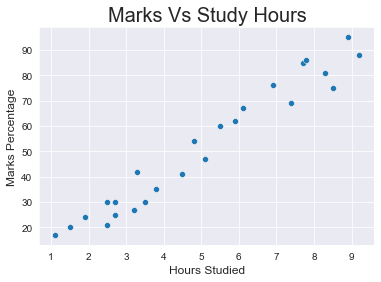

In [86]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

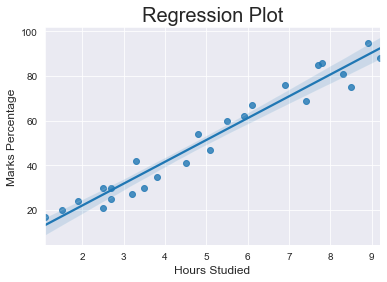

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [87]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

In [88]:
x = data.drop(["Scores"], axis = 1)
y = data.Scores.values;
x = preprocessing.StandardScaler().fit(x)
print(y);
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [89]:
regression = LinearRegression()
regression.fit(x_train, y_train)
#pred_y = regression.predict(x_test)

LinearRegression()

In [90]:
ypred = regression.predict(x_test)

In [91]:
ypred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [92]:
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Marks': [k for k in ypred]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [93]:
compare_scores = pd.DataFrame({'Real marks': y_test, 'Predicted Marks': ypred})
compare_scores

,Real marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


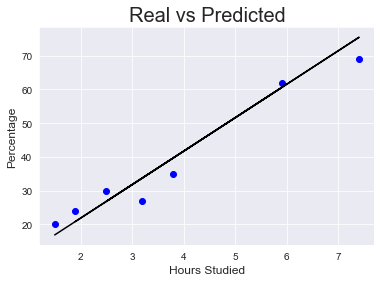

In [94]:
plt.scatter(x=x_test, y=y_test, color='blue')
plt.plot(x_test, ypred, color='Black')
plt.title('Real vs Predicted', size=20)
plt.ylabel('Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [95]:
MSE = mean_squared_error(y_test, ypred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

4.5092043283688055


In [98]:
hours = [8]
answer = regression.predict([hours])
print("Score percentage = {}%".format(round(answer[0],1)))

Score percentage = 81.5%
